## 阈值分割

In [ ]:
import os 
path = "/root/projects/WS-U2net/U-2-Net/SEM_DATA/CSV"
csv_list = os.listdir(path)
for csv in csv_list:
    df = pd.read_csv(csv)

### 灰度值直方图

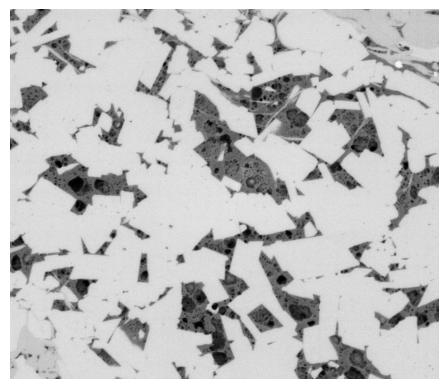

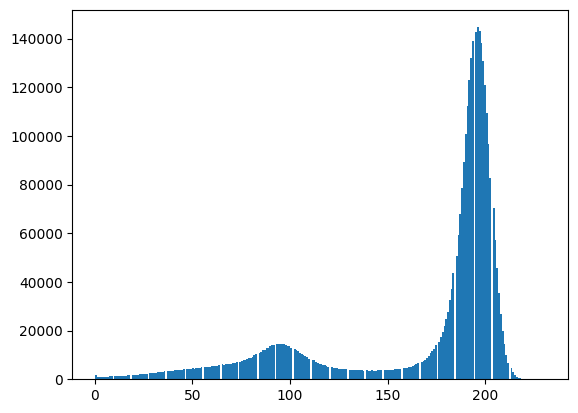

In [4]:
from matplotlib import pyplot as plt
import cv2

img_path = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1 - 003.jpeg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
plt.hist(img.ravel(), bins=256)
plt.show()


In [ ]:
import torch
import torch.nn as nn

# 假设输入特征图的尺寸为 2048x1768
input_tensor = torch.randn(1, 1, 2048, 1768)

# Max Pooling 阶段
maxpool = nn.MaxPool2d(2, 2, return_indices=True)
unpool = nn.MaxUnpool2d(2, 2)

# 第一次 Max Pooling
pooled_tensor1, indices1 = maxpool(input_tensor)
# 第二次 Max Pooling
pooled_tensor2, indices2 = maxpool(pooled_tensor1)
# 第三次 Max Pooling
pooled_tensor3, indices3 = maxpool(pooled_tensor2)
# 第四次 Max Pooling
pooled_tensor4, indices4 = maxpool(pooled_tensor3)

# 计算每次 Pooling 后的尺寸，并考虑到向下取整的情况
output_size1 = (pooled_tensor1.size(2) * 2, pooled_tensor1.size(3) * 2)
output_size2 = (pooled_tensor2.size(2) * 2, pooled_tensor2.size(3) * 2)
output_size3 = (pooled_tensor3.size(2) * 2, pooled_tensor3.size(3) * 2)
output_size4 = (pooled_tensor4.size(2) * 2, pooled_tensor4.size(3) * 2)  # 这里需要根据实际情况调整

# Max Unpooling 阶段
# 第四次 Max Unpooling
unpooled_tensor4 = unpool(pooled_tensor4, indices4, output_size=(pooled_tensor3.size(2),pooled_tensor3.size(3)))
# 第三次 Max Unpooling
unpooled_tensor3 = unpool(unpooled_tensor4, indices3, output_size=output_size3)
# 第二次 Max Unpooling
unpooled_tensor2 = unpool(unpooled_tensor3, indices2, output_size=output_size2)
# 第一次 Max Unpooling
unpooled_tensor1 = unpool(unpooled_tensor2, indices1, output_size=output_size1)  # 原始输入尺寸

# 最终还原的特征图尺寸
print(unpooled_tensor1.shape)

torch.Size([1, 1, 2048, 1768])
